In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# DataFrames 
players = pd.read_csv("datasets/players.csv")
players_stats = pd.read_csv("datasets/player_szn_stats.csv")
nba_teams = pd.read_csv("datasets/teams.csv")
szn_types = pd.read_csv("datasets/szn_types.csv")
szn_stats = pd.read_csv("datasets/Seasons_Stats.csv") 


In [176]:
def clean_name(s: str):
    if isinstance(s, str) and s.endswith("*"):
        return s[:-1]
    return s

In [178]:
szn_stats["Player"] = szn_stats["Player"].apply(clean_name)

In [179]:
merged = players_stats.merge(nba_teams, on="team_id")
merged = merged.merge(players, on="player_id")
merged["player_name"] = merged["first_name"] + " " + merged["last_name"]
merged[["player_id", "full_name", "season_id", "player_name", "league_id_x"]].drop_duplicates()


,player_id,full_name,season_id,player_name,league_id_x
0,0,Boston Celtics,2010,Shaquille O'Neal,0
3,0,Cleveland Cavaliers,2009,Shaquille O'Neal,0
5,0,Miami Heat,2004,Shaquille O'Neal,0
7,0,Miami Heat,2005,Shaquille O'Neal,0
9,0,Miami Heat,2006,Shaquille O'Neal,0
...,...,...,...,...,...
116224,17400004,Indianapolis Olympians,2020,Nnamdi Vincent,174
116225,17400005,Boston Celtics,2020,Juampi Vaulet,174
116226,17400006,Boston Celtics,2020,Leandro Nicolas-Bolmaro,174
116227,17400007,Indiana Pacers,2020,Avi Koki,174


### Descriptive analysis of the dataset

Lets take a look at who are the players and teams that have performed the best over the years. For this analysis we will only be looking at the NBA, and regular season statistics.


In [180]:
top_scoring_players = szn_stats[["Player", "PTS", "Year"]].groupby("Player").sum().sort_values(by="PTS", ascending=False).head(5)
top_players = top_scoring_players.index

In [181]:
player_with_teams = szn_stats.merge(merged, left_on="Player", right_on="player_name")

In [196]:

top_scoring_teams = player_with_teams.groupby("full_name").sum().sort_values(by="PTS", ascending=False).head(5)
top_teams = top_scoring_teams.index

Index(['Los Angeles Lakers', 'Boston Celtics', 'Atlanta Hawks',
       'New York Knicks', 'Philadelphia 76ers'],
      dtype='object', name='full_name')

<Axes: title={'center': 'Top Scoring teams all Time'}, xlabel='Team', ylabel='Total Points'>

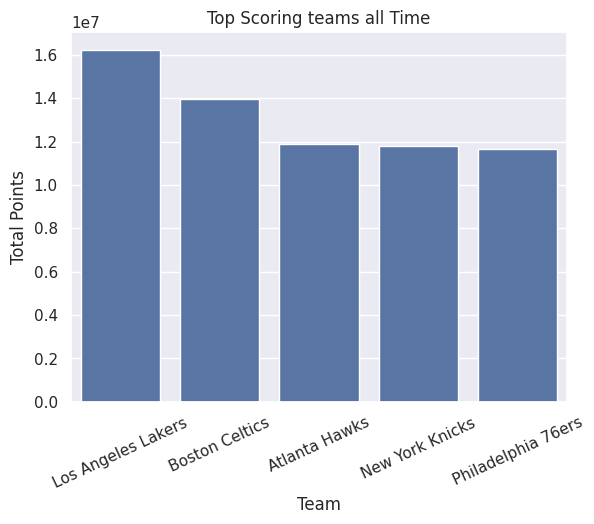

In [197]:
def plot_top_scoring_teams():
    plot = sns.barplot(data=top_scoring_teams.reset_index(), y="PTS", x="full_name")
    plot.set(title="Top Scoring teams all Time", xlabel="Team", ylabel="Total Points")
    plot.tick_params(axis="x", rotation=25)

    return plot

plot_top_scoring_teams()

<Axes: title={'center': 'Top Scoring teams over Time'}, xlabel='Year', ylabel='Total Points'>

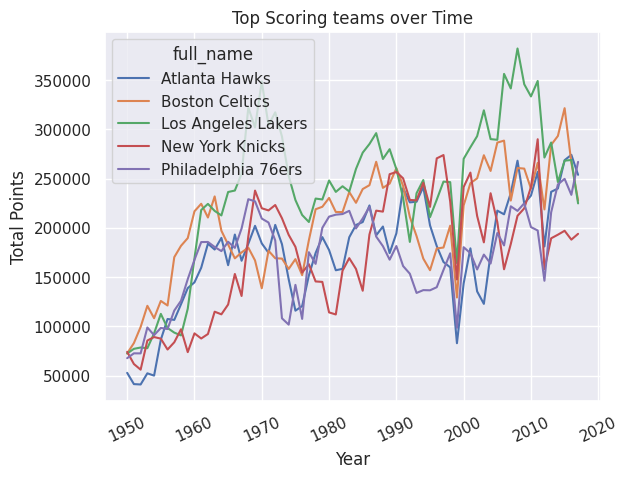

In [201]:
def plot_top_scoring_teams_over_time():
    team_points_per_year = player_with_teams[player_with_teams["full_name"].isin(top_teams)].groupby(["full_name", "Year"]).sum().reset_index()
    plot = sns.lineplot(data=team_points_per_year, x="Year", y="PTS", hue="full_name")
    plot.set(title="Top Scoring teams over Time", xlabel="Year", ylabel="Total Points")
    plot.tick_params(axis="x", rotation=25)
    return plot

plot_top_scoring_teams_over_time()
    

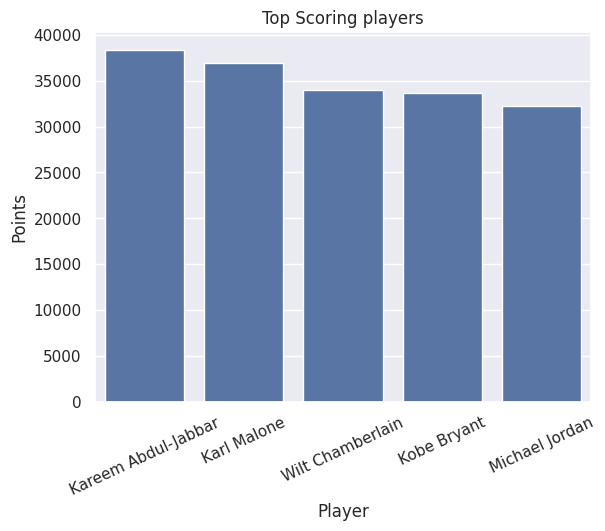

In [183]:
def plot_top_scoring_players():
    plot = sns.barplot(data=top_scoring_players, y="PTS", x="Player")
    plot.set(title="Top Scoring players", ylabel="Points")
    plot.tick_params(axis="x", rotation=25)
    return plot

plot_top_scoring_players()

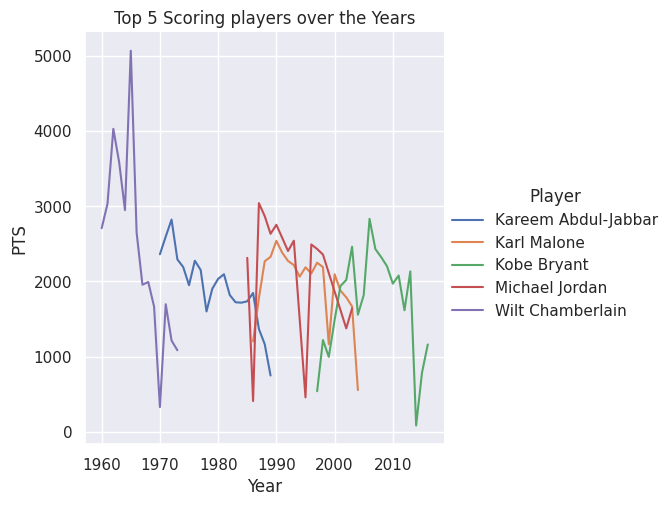

In [184]:
players_per_year = szn_stats[szn_stats["Player"].isin(top_players)].groupby(["Player", "Year"]).sum().reset_index()
plot = sns.relplot(data=players_per_year, x="Year", y="PTS", hue="Player", kind="line")
plot.set(title="Top 5 Scoring players over the Years")